## Introduction
TODO

In [14]:
# Run for required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix #accuracy metrics for each classification
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif

## Dataset Description
Our dataset consists of quantitative descriptions of various wines. There are 1599 wines sampled. We have 11 features for each observation, each with a numeric rating of a physiochemical property of the wine such as alcohol content and acidity. The output variable we seek to predict corresponds to the quality rating of each wine, from sensory data. There are no missing values. Based on the distribution of the ratings, we compare the six categorical ratings (integers 3-6) with a condensed three categories (bad:3-4, medium:5-6, good:7-8).

In [4]:
#Read in data
filename = "./winequality-red.csv"
df = pd.read_csv(filename, delimiter = ';')
X = df.values[:,0:-1]
y = df.values[:,-1]

#Normalize Feature Data
X = preprocessing.normalize(X)

#Split data into test/train sets and create condensed categories
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .30, random_state = 101)
#y_train_threecat = (y_train - 1) // 2 # if 3-4 then 1, if 5-6 then 2, if 7-8 then 3
#y_test_threecat = (y_test - 1) // 2

#Print dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<BarContainer object of 6 artists>

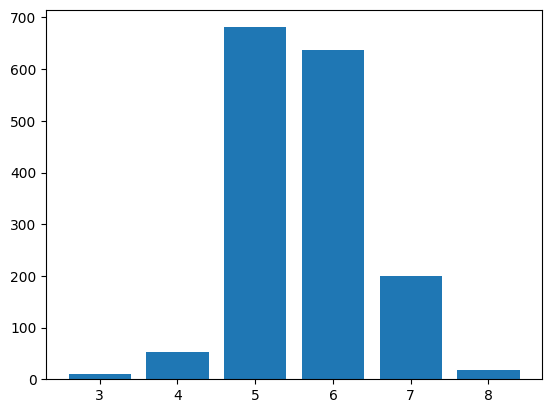

In [5]:
d = collections.Counter(y)
plt.bar(d.keys(), d.values())

## Experimental Setup 

TODO

[[0.5227882  0.48525469 0.52010724]
 [0.60589812 0.6461126  0.60857909]
 [0.48793566 0.35656836 0.49061662]
 [0.47989276 0.50134048 0.48793566]]
[[0.5227882  0.60589812 0.48793566 0.47989276]
 [0.48525469 0.6461126  0.35656836 0.50134048]
 [0.52010724 0.60857909 0.49061662 0.48793566]]


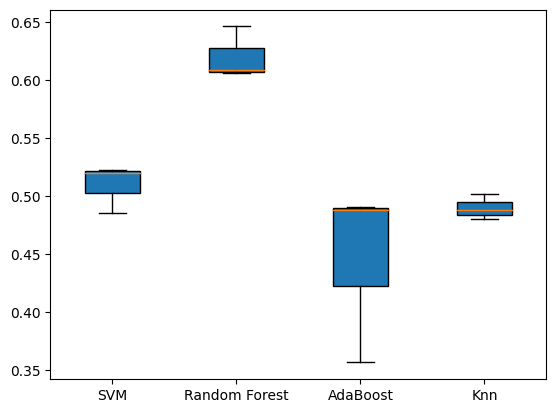

In [13]:
# ML Estimators to test
names = ["Decision Tree",
         "Random Forest",
         "AdaBoost",
         "Knn",
         "SVM"
         ]
estimators = [tree.DecisionTreeClassifier(),
              RandomForestClassifier(),
              AdaBoostClassifier(),
              KNeighborsClassifier(),
              SVC()
              ]

num_est = len(estimators)
num_kfolds = 3

# Initilize storge for accuaccy measure
acc = np.zeros([num_est, num_kfolds])

# Run CV for each estimator and gather accuracy scores
for name, est in zip(names, estimators):
    acc[estimators.index(est), :] = cross_val_score(est, X_train, y_train, cv=num_kfolds)

print(acc)
print(acc.T)
# Plot results

fig = plt.figure()
plt.boxplot(acc.T, patch_artist=True, labels=names)
#ax1 = fig.add_subplot(111)
#ax1.scatter(names, mse, c='b', marker='o', label='Mean Squared Error 6 Categories')
#ax1.scatter(names, avg_acc, c='m', marker='o', label='Accuracy 6 Categores')
#ax1.scatter(names, mse_threecat, c='b', marker='s', label='Mean Squared Error 3 Categories')
#ax1.scatter(names, acc_threecat, c='m', marker='s', label='Accuracy 3 Categories')
#plt.legend(loc='best')
plt.show()

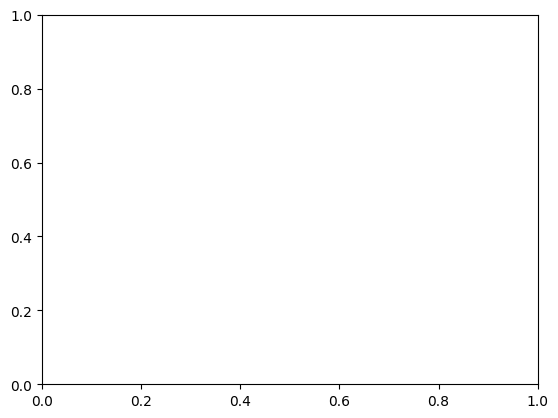

In [ ]:
# ML Estimators to test
names = ["SVM",
         "Random Forest",
         "AdaBoost",
         "Knn"
         ]
estimators = [SVC(),
              RandomForestClassifier(),
              AdaBoostClassifier(),
              KNeighborsClassifier(),
              ]

num_est = len(estimators)
num_outer_splits = 3
num_inner_splits = 2
# Cost metrics to compare
mse = []
acc = np.zeros([num_est, num_outer_splits*num_inner_splits])
mse_threecat = []
acc_threecat = []

# Outer CV
kf = KFold(n_splits=num_outer_splits)
for out, (train_index, test_index) in enumerate(kf.split(X)):
    X_train = df.values[train_index, 0:-1]
    y_train = df.values[train_index, -1]
    temp = zeros(num_est, num_inner_splits)
    # Run CV on each estimator
    for name, est in zip(names, estimators):
        #print(names.index(name))
        temp[estimators.index(est), :] = cross_val_score(est, X_train, y_train, cv=num_inner_splits)
        #est.fit(X_train, y_train)
        #y_pred = est.predict(X_test)
        #mse.append(mean_squared_error(y_pred, y_test))
        #acc.append(accuracy_score(y_pred, y_test))
    acc = acc + temp

# Average of outer CV
#avg_acc = np.average(acc, axis=0)
#print(avg_acc)
# Run each estimator and evaluate cost metric for 3 condensed categories
#for name, est in zip(names, estimators):
 #   est.fit(X_train, y_train_threecat)
  #  y_pred_threecat = est.predict(X_test)
  #  mse_threecat.append(mean_squared_error(y_pred_threecat, y_test_threecat))
  #  acc_threecat.append(accuracy_score(y_pred_threecat, y_test_threecat))

# Plot results
fig = plt.figure()
data = 
boxplot
#ax1 = fig.add_subplot(111)
#ax1.scatter(names, mse, c='b', marker='o', label='Mean Squared Error 6 Categories')
#ax1.scatter(names, avg_acc, c='m', marker='o', label='Accuracy 6 Categores')
#ax1.scatter(names, mse_threecat, c='b', marker='s', label='Mean Squared Error 3 Categories')
#ax1.scatter(names, acc_threecat, c='m', marker='s', label='Accuracy 3 Categories')
#plt.legend(loc='best')
#plt.show()

## Results
TODO 

## Resources Used
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html